In [2]:
import os

In [3]:
os.getcwd()

'c:\\Users\\SeoMinJong\\github\\deep_learning'

In [4]:
!cd "C:\study_data"

In [5]:
%cd C:\study_data

C:\study_data


In [6]:
os.getcwd()

'C:\\study_data'

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os

import matplotlib.pyplot as plt
from PIL import Image

# list_dir
### (path) 경로에 있는 객체(폴더 및 이미지)의 이름들을 가져온다.

In [ ]:
img = Image.open('archive/flowers/daisy/5547758_eea9edfd54_n.jpg')
img

In [ ]:
plt.imshow(img)
plt.show()

In [87]:
def list_dir(path):
    filenames = os.listdir(path)
    filenames.sort()
    return filenames

In [88]:
target_names = list_dir(path)
print(target_names)

# load_image_pixels
### (image_path, resolution) resolution에 입력된 대로 image_path의 이미지를 정규화 해준다.

In [ ]:
img_array = np.array(img)
print("img_array.shape :",img_array.shape)
print("img_array :\n",img_array)

In [44]:
resized = img.resize([100,100])
resuzed_array = np.array(resized)
resuzed_array.shape

(100, 100, 3)

In [51]:
def load_image_pixels(imagepath, resolution):
    img         = Image.open(imagepath)
    img_resized = img.resize(resolution)
    return np.array(img_resized)

# flowers_init
### (resolution) 만들어진 list_dir, load_image_pixels를 사용해서 폴더의 이름으로 분류를 만들어줄 수 있게 하고 2중 for문을 사용해서 폴더에 접근하고 그 하위의 폴더에 접근 할 수 있도록 list_dir을 사용해서 이미지 파일들을 저장해준다. 또한 jpg가 아닌 확장자를 고려해 if분기로 예외처리 해준다.

In [60]:
path = 'C:\study_data/archive/flowers/'

filenames = os.listdir(path)
print("filenames :",filenames)

In [ ]:
for dx, dname in enumerate(target_names):
    print("dname :",dname)

    sub_path = path + dname
    print("sub_path :",sub_path)

    filenames = list_dir(sub_path)
    print("filenames : \n",filenames[:3])

In [53]:
image_path = os.path.join(sub_path,filenames[3])
print("image_path :",image_path)

image_path : C:\study_data/archive/flowers/tulip\10128546863_8de70c610d.jpg


In [72]:
def flowers_init(resolution):
    path         = 'archive/flowers/'
    target_names = list_dir(path=path)

    images = []
    idxs = []

    for dx, dname in enumerate(target_names):
        print("dname :",dname)

        sub_path = path + dname
        print("sub_path :",sub_path)

        filenames = list_dir(sub_path)
        print("filenames : \n",filenames[:3])

        for fname in filenames:
            if fname[-4:] != ".jpg":
                continue
            imagepath = os.path.join(sub_path,fname)
            pixels = load_image_pixels(imagepath, resolution)

            images.append(pixels)

            idxs.append(dx)
    
    xs = np.asarray(images, dtype='float32')

    return xs, images, idxs


In [73]:
resolution = [100,100]
xs, images, idxs = flowers_init(resolution)

dname : daisy
sub_path : archive/flowers/daisy
filenames : 
 ['100080576_f52e8ee070_n.jpg', '10140303196_b88d3d6cec.jpg', '10172379554_b296050f82_n.jpg']
dname : dandelion
sub_path : archive/flowers/dandelion
filenames : 
 ['10043234166_e6dd915111_n.jpg', '10200780773_c6051a7d71_n.jpg', '10294487385_92a0676c7d_m.jpg']
dname : rose
sub_path : archive/flowers/rose
filenames : 
 ['10090824183_d02c613f10_m.jpg', '102501987_3cdb8e5394_n.jpg', '10503217854_e66a804309.jpg']
dname : sunflower
sub_path : archive/flowers/sunflower
filenames : 
 ['1008566138_6927679c8a.jpg', '1022552002_2b93faf9e7_n.jpg', '1022552036_67d33d5bd8_n.jpg']
dname : tulip
sub_path : archive/flowers/tulip
filenames : 
 ['100930342_92e8746431_n.jpg', '10094729603_eeca3f2cb6.jpg', '10094731133_94a942463c.jpg']


In [ ]:
print(idxs)

In [77]:
print(pd.DataFrame(idxs).value_counts())

1    1052
4     984
2     784
0     764
3     733
dtype: int64


In [79]:
print("xs.shape :",xs.shape)
print("xs[0].shape :",xs[0].shape)
# 분명 이미지의 차원은 3개의 차원으로 표현할 수 있는데 데이터셋이 포함된 차원은 총 4차원으로 표현된다.

xs.shape : (4317, 100, 100, 3)
xs[0].shape : (100, 100, 3)


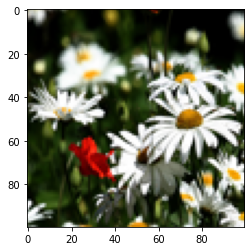

In [84]:
img = xs[5]

img_image = Image.fromarray(np.uint8(img))
# uint8은 2**8의 uint을 뜻하고 이미지를 표현하는 방법은 0~255로 256개의 값으로 이루어지기 때문에 uint8이 사용되는 것
plt.imshow(img_image)
plt.show()